In [2]:
!pip -q install ultralytics pillow #run a shell command
#pillow allows you to open and format them

from ultralytics import YOLO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt #shows images and plots

print("Ultralytics version:", YOLO.__module__.split('.')[0])

Ultralytics version: ultralytics


In [17]:
model=YOLO("yolov8x.pt") #model name

In [37]:
from google.colab import files #lets you upload files
up = files.upload()  # pick a JPG/PNG when done it uploads to colab's current folder
#returns a dictionary

img_path = list(up.keys())[0] #gets the first file name from that dictionary
#gives all uploaded file names (we just pick one)
print("File name:", img_path)
#now img_path has the name of your uploaded image

Saving Screenshot 2025-10-01 at 7.54.01 PM.png to Screenshot 2025-10-01 at 7.54.01 PM.png
File name: Screenshot 2025-10-01 at 7.54.01 PM.png



image 1/1 /content/Screenshot 2025-10-01 at 7.54.01 PM.png: 384x640 8 bottles, 1 cup, 4 bowls, 3 apples, 7 oranges, 1 broccoli, 1 carrot, 1 refrigerator, 2458.6ms
Speed: 3.3ms preprocess, 2458.6ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)


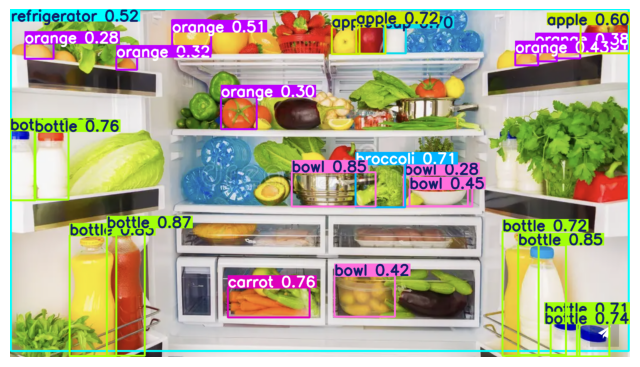

In [38]:
res = model(img_path)[0]        # first (and only) image result, if we are passing multiple we can use loop

annot = res.plot()          #ask yolo to draw boxes and labels    # returns NumPy array (BGR colors)
plt.figure(figsize=(8,6)) #create a figure window to show image (8x6) returns new figure object
plt.imshow(annot[..., ::-1])    # convert BGR->RGB for correct color display
plt.axis("off") #hide x-y axes
plt.show() #show image

In [34]:
print("Detections:") #print header
for b in res.boxes:
    cls_id = int(b.cls.item())
    name = res.names[cls_id]
    conf = float(b.conf.item()) # try adding an IF statement for in threshold
    #if conf > 40:
    print(f"- {name}: {conf:.2f}")

Detections:
- bottle: 0.88
- refrigerator: 0.81
- bottle: 0.61
- bottle: 0.60
- cake: 0.36
